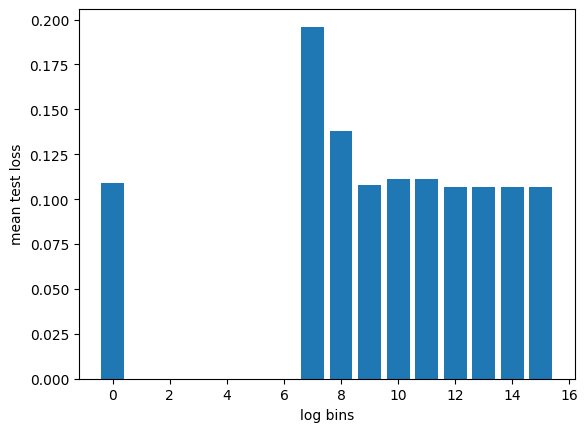

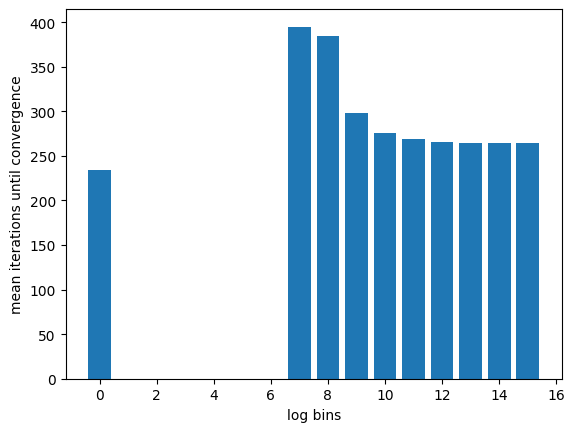

In [24]:
from gen_data import gen_data
from sklearn.preprocessing import MinMaxScaler
from experiment import experiment
scaler = MinMaxScaler(feature_range=(-1, 1))



X,y = gen_data()
X = scaler.fit_transform(X)

bias = np.ones((X.shape[1],1)).T
X = np.vstack((bias, X)).astype(float)
X = X.T
y = y.T
bins = [1,2,3,4]
normal_iters, quant_iters,  w_quant, w = experiment(X,y, [3], range(7,16))

In [25]:
from QuantLog import quantlogistic
from NormalLog import normallogistic
import numpy as np

#generate random uniformally random w in [-1,1
# ]to test gradient func on
w_test = np.random.rand(X.shape[1]) *2 -1


loss, ng = normallogistic(w_test,X.T,y.T)
grads = [ng]
for i in range(1,6):
    loss, grad = quantlogistic(w_test,X.T,y.T,i)
    grads.append(grad)
    
    
print(np.hstack((grads)))

#actual gradient without quant is the leftmost col, the rightmost col is for 2^4 quantization levels

[[-0.27584909 -0.14526186 -0.24739243 -0.26979408 -0.27465844 -0.27545624]
 [-0.05124671 -0.08473972 -0.05650139 -0.05280668 -0.05160942 -0.05121654]
 [ 0.14302556  0.16103169  0.14498642  0.14287527  0.14318969  0.14288552]
 [-0.0369329  -0.0633836  -0.03910367 -0.03617726 -0.03708885 -0.03702063]
 [-0.01765299 -0.01796568 -0.01775905 -0.01727112 -0.01762522 -0.01766352]
 [ 0.04634774 -0.02922736  0.0326816   0.04385411  0.04567797  0.04617172]
 [ 0.14354115  0.13420098  0.13886926  0.14207132  0.14286204  0.14340369]
 [ 0.05227378  0.06572621  0.05442319  0.05209103  0.05196757  0.05207651]
 [ 0.07874737  0.04923364  0.07290279  0.07764773  0.07830899  0.07842647]
 [ 0.11501912  0.08943141  0.10918028  0.11371551  0.11476843  0.11500497]
 [ 0.04395792  0.01938932  0.03974582  0.04316836  0.04360119  0.04382279]
 [-0.0478777  -0.0384596  -0.04554134 -0.04739804 -0.04774535 -0.04781524]
 [-0.02528685  0.00129962 -0.01936453 -0.0243143  -0.02518067 -0.02526473]
 [-0.00837475 -0.01655625

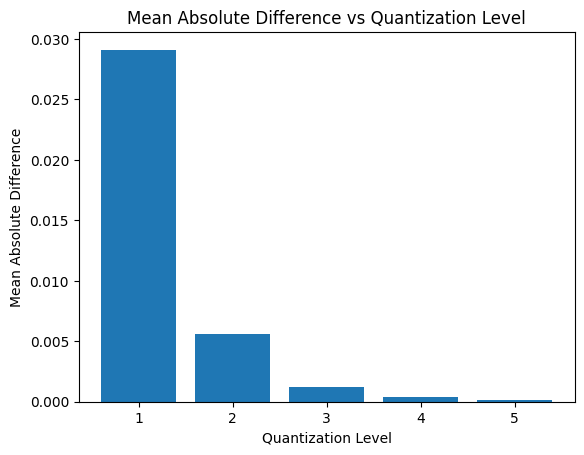

In [26]:
# plot average error of quantization for each feature

import matplotlib.pyplot as plt
quant_lvl = [1,2,3,4,5]
vals = []

for grad in grads[1:]:

    vals.append(np.mean(np.abs(ng - grad)))

plt.bar(quant_lvl,vals)
plt.xlabel('Quantization Level')
plt.ylabel('Mean Absolute Difference')
plt.title('Mean Absolute Difference vs Quantization Level')
plt.show()

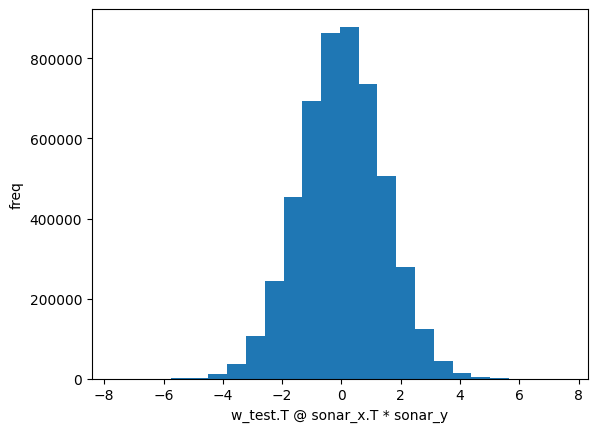

In [27]:
#plot the distribution of the argument for sigmoid func over 1000 random w's from [-1,1] 
vals = []
for i in range(1000):
    w_test = np.random.rand(X.shape[1]) *2 -1
    vals.extend((w_test.T @ X.T ) * y)

plt.hist(vals,bins = 24)
plt.xlabel("w_test.T @ sonar_x.T * sonar_y")
plt.ylabel("freq")
plt.show()

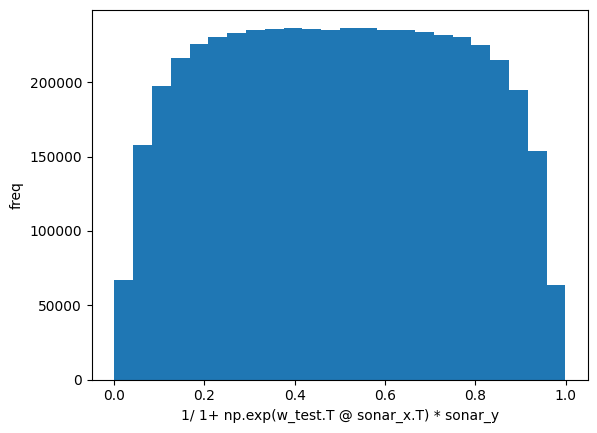

In [28]:
# a histogram of the distribution of sigmoid function over synthetic data
f_vals = []
for i in range(1000):
    w_test = np.random.rand(X.shape[1]) *2 -1
    vals = (w_test.T @ X.T) * y
    f_vals.extend(1/(1+np.exp(vals)))

plt.hist(f_vals,bins = 24)
plt.xlabel("1/ 1+ np.exp(w_test.T @ X.T) * y")
plt.ylabel("freq")
plt.show()

Text(0.5, 1.0, 'dist for 2**3 quantization lvls for gradient across runs of 2^9,10,11 lvls for w')

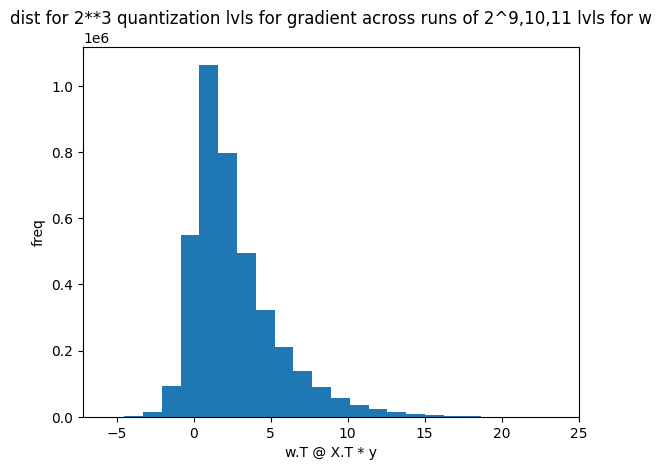

In [29]:

data = np.genfromtxt(f'values{3}.csv', delimiter=',').flatten() #need to flatten or else will look funny

plt.figure()

plt.hist(data, bins = 24)

plt.xlabel("w.T @ X.T * y")
plt.ylabel("freq")
plt.title(f"dist for 2**3 quantization lvls for gradient across runs of 2^9,10,11 lvls for w")

In [30]:
# could be explained by the fact that there are many more positive labels than negative ones
print(np.mean(y))

0.2484
